In [1]:
import numpy as np
pcd_np = np.loadtxt('bike_florent.txt', delimiter=';', skiprows=1)
pcd_np[0:5]

array([[  1.17148709,   1.24782467,   2.320436  , 205.        ,
        201.        , 190.        ],
       [  1.45999289,   1.34168911,   2.30516148, 197.        ,
        197.        , 189.        ],
       [  1.32919371,   1.29969215,   2.29750204, 162.        ,
        161.        , 157.        ],
       [  1.51531589,   1.356915  ,   2.30085373, 198.        ,
        199.        , 193.        ],
       [  1.35053456,   1.29682446,   2.29206324, 122.        ,
        121.        , 115.        ]])

In [2]:
# Print the first point
print('First point of the data\n', pcd_np[0])

# Print the first 5 points
print('First 5 points\n', pcd_np[0: 5])

# Print the first three columns (i.e., X, Y, Z) for all points
print('First three columns X, Y, Z\n', pcd_np[:, 0:3])

# Print the last three columns (i.e., X, Y, Z) for the first 4 points
print('R, G, B information of the first four-point \n', pcd_np[0: 4, 3: 6])

First point of the data
 [  1.17148709   1.24782467   2.320436   205.         201.
 190.        ]
First 5 points
 [[  1.17148709   1.24782467   2.320436   205.         201.
  190.        ]
 [  1.45999289   1.34168911   2.30516148 197.         197.
  189.        ]
 [  1.32919371   1.29969215   2.29750204 162.         161.
  157.        ]
 [  1.51531589   1.356915     2.30085373 198.         199.
  193.        ]
 [  1.35053456   1.29682446   2.29206324 122.         121.
  115.        ]]
First three columns X, Y, Z
 [[1.17148709 1.24782467 2.320436  ]
 [1.45999289 1.34168911 2.30516148]
 [1.32919371 1.29969215 2.29750204]
 ...
 [2.58916903 1.47514415 0.39343202]
 [2.6242075  1.52383852 0.39060414]
 [2.76442361 1.74942136 0.35215938]]
R, G, B information of the first four-point 
 [[205. 201. 190.]
 [197. 197. 189.]
 [162. 161. 157.]
 [198. 199. 193.]]


In [3]:
import pandas as pd

# Load the point cloud data from the specified csv using pd.read_csv
pcd_pd = pd.read_csv('bike_florent.txt', delimiter=';')

# Display the subset of the loaded point cloud data (rows 1 to 5, index 0 to 4)
pcd_pd.iloc[0: 5]

,X,Y,Z,R,G,B
0,1.171487,1.247825,2.320436,205,201,190
1,1.459993,1.341689,2.305161,197,197,189
2,1.329194,1.299692,2.297502,162,161,157
3,1.515316,1.356915,2.300854,198,199,193
4,1.350535,1.296824,2.292063,122,121,115


In [7]:
import open3d as o3d

pcd_o3d = o3d.io.read_point_cloud("seychelles-beach.ply")
o3d.visualization.draw_geometries([pcd_o3d])

MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


In [8]:
# Create an Open3D PointCloud object
pcd_np_o3d = o3d.geometry.PointCloud()

# Set the points of the PointCloud using the x, y, z coordinates from pcd_np
pcd_np_o3d.points = o3d.utility.Vector3dVector(pcd_np[:, 0:3])

# Set the scaled colors of the PointCloud using the RGB values from pcd_np
pcd_np_o3d.colors = o3d.utility.Vector3dVector(pcd_np[:, 3:6] / 255)

# Visualize the PointCloud using Open3D's visualization capabilities
o3d.visualization.draw_geometries([pcd_np_o3d])

MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


In [6]:
# Create an Open3D PointCloud object
pcd_pd_o3d = o3d.geometry.PointCloud()

# Set the points of the PointCloud using the x, y, z coordinates from pcd_pd
pcd_pd_o3d.points = o3d.utility.Vector3dVector(np.array(pcd_pd[['X', 'Y', 'Z']]))

# Set the colors of the PointCloud using the RGB values from pcd_pd
pcd_pd_o3d.colors = o3d.utility.Vector3dVector(np.array(pcd_pd[['R', 'G', 'B']] / 255))

# Visualize the PointCloud using Open3D's visualization capabilities
o3d.visualization.draw_geometries([pcd_pd_o3d])

MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


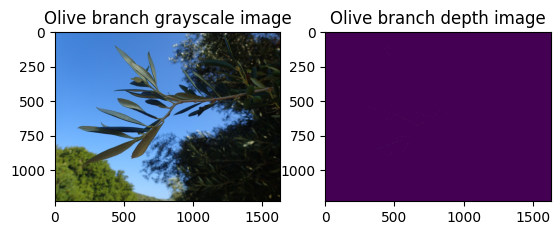

In [9]:
import matplotlib.pyplot as plt

depth_raw = o3d.io.read_image("depth.png")
color_raw = o3d.io.read_image("rgb.jpg")

# Create an RGB image object
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw, convert_rgb_to_intensity = False)

plt.subplot(1, 2, 1)
plt.title('Olive branch grayscale image')
plt.imshow(rgbd_image.color)

plt.subplot(1, 2, 2)
plt.title('Olive branch depth image')
plt.imshow(rgbd_image.depth)

plt.show()

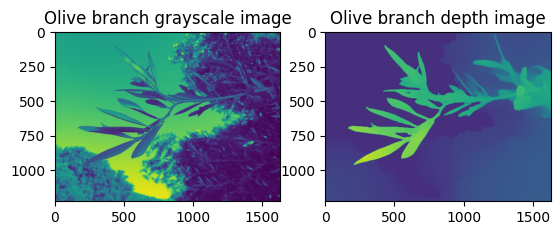

In [11]:
depth_8 = (np.array(depth_raw) / 256).astype('uint8')
depth_raw_8 = o3d.geometry.Image((depth_8).astype(np.uint8))
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw_8)

plt.subplot(1, 2, 1)
plt.title('Olive branch grayscale image')
plt.imshow(rgbd_image.color)

plt.subplot(1, 2, 2)
plt.title('Olive branch depth image')
plt.imshow(rgbd_image.depth)

plt.show()